# Práctica 12: Análisis de texto con nltk y wordcloud

Esta práctica está enfocada a trabajar con otro tipo de datos como lo son ***texto o audio***, de igual manera usados en muchas aplicaciones y por lo tanto importante saber que es posible hacer con ellos. En ambos casos texto o audio es importante saber como se puede extraer de las distintas fuentes en las que se puede encontrar y que información podemos obtener de él, tales como el análisis de sentimientos a partir del texto o reconocimiento de instrucciones a partir de órdenes orales.

Los datos a usar en esta practica se encontraron en [Kaggle]( https://www.kaggle.com/kapastor/democratvsrepublicantweets#ExtractedTweets.csv) los cuales son tweets (texto) de la plataforma [Twitter]( https://twitter.com/) los cuales fueron hechos por representantes de los partidos Demócratas y Republicanos políticos de Estados Unidos.


In [1]:
import numpy as np
import pandas as pd
import nltk
datos=pd.read_csv('ExtractedTweets.csv')
datos.head(5)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


En esta ocasión se utiliza la herramienta [NLTK]( https://www.nltk.org/) la cual es una librería que permite analizar texto y entre sus funciones mas importantes se encuentra el análisis de sentimientos. Una de las preguntas de interés es obtener cuales son las palabras que mas usan cada uno de los partidos políticos, para ello se utiliza la librería [WordCloud]( https://github.com/amueller/word_cloud) la cual nos permite generar una imagen donde el tamaño de las palabras que aparecen es proporcional al número de veces que aparece en el texto.

In [34]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


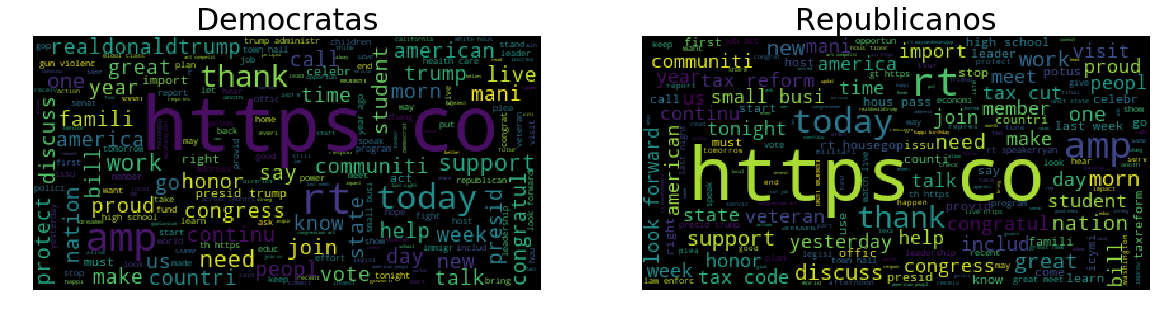

In [89]:
dic=stopwords.words("english")
stemmer=SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación

reemplazos = []
d=len(datos.loc[datos.Party=='Democrat'])

for r in range(len(datos)):
    original = datos.Tweet[r]
    reemplazo = ''
    quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in dic]
    reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)

datos['limpios'] = reemplazos
demo=reemplazos[:d]
repu=reemplazos[d:]
texto1 = ' '.join(demo)
texto2 = ' '.join(repu)
nube1 = WordCloud().generate(texto1)
nube2 = WordCloud().generate(texto2)
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(nube1)
ax[0].axis("off")
ax[0].set_title('Democratas',fontsize=30)
ax[1].imshow(nube2)
ax[1].axis("off")
ax[1].set_title('Republicanos',fontsize=30)
plt.show()

Las palabras con mayor frecuencia aparecen en la misma proporción en ambos partidos, sin embargo, **en el partido de los Demócratas aparece el nombre del presidente de USA** mientras que los Republicanos parece no importarle.

Ahora se utiliza el análisis de sentimientos de la librería NTLK a los tweets de los representantes de cada partido político, para evaluar que sentimientos transmiten sus mensajes.

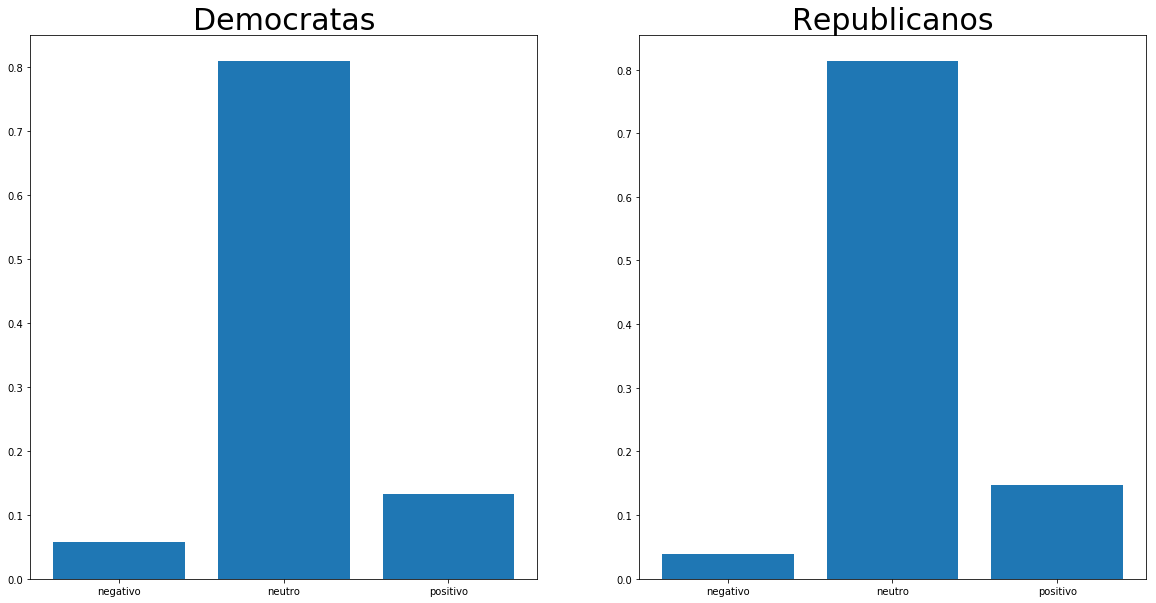

In [107]:
s=SentimentIntensityAnalyzer()
neg=list()
neu=list()
pos=list()
for i in range(len(datos)):
    res=s.polarity_scores(datos.Tweet[i])
    neg.append(res['neg'])
    neu.append(res['neu'])
    pos.append(res['pos'])
datos['neg']=neg
datos['neu']=neu
datos['pos']=pos

d=len(datos.loc[datos.Party=='Democrat'])
r=len(datos)-d
democratas=list()
republicanos=list()
for i in ['neg','neu','pos']:
    democratas.append(np.sum(datos[i][datos.Party=='Democrat'])/d)
    republicanos.append(np.sum(datos[i][datos.Party=='Republican'])/r)

fig, ax=plt.subplots(1,2,figsize=(20,10))
ax[0].bar(['negativo','neutro','positivo'],democratas)
ax[0].set_title('Democratas',fontsize=30)
ax[1].bar(['negativo','neutro','positivo'],republicanos)
ax[1].set_title('Republicanos',fontsize=30)
plt.show()

In [105]:
print(republicanos,democratas)

[0.03915207695080212, 0.8132470490178444, 0.14760087403135924] [0.05716178568032682, 0.8096657792146146, 0.13312282495008182]


Como se observa la gran mayoría de los tweets entran en la categoría neutra, **lo que indica que los representantes comparten información de forma muy cuidadosa para no mal interpretar los mensajes**.

Se tenia la idea de entrenar un clasificador a partir de los componentes sentimentales de los textos para identificar si el mensaje fue escrito por un Demócrata o por un Republicano, pero parece que no hay diferencia entre un partido y otro en cuanto a transmisión de sentimientos se refiere.